In [1]:
p53_genes = [
    'TP53', 'CDKN1A', 'MDM2', 'BAX', 'GADD45A', 'FAS', 'BBC3', 'NOXA', 'PMAIP1',
    'CCND1', 'CDK2', 'CDK4', 'RB1', 'E2F1', 'ATM', 'ATR', 'CHEK1', 'CHEK2',
    'CASP3', 'CASP8', 'CASP9', 'CYCS', 'BCL2', 'BCL2L1', 'BID',
    'GADD45B', 'GADD45G', 'PCNA', 'SESN1', 'SESN2', 'SFN', 'ZMAT3',
    'RRM2B', 'DDB2', 'XPC', 'PMAIP1', 'TP73', 'TP63', 'PTEN', 'AKT1', 'PIK3CA',
    'CDKN2A', 'CCNE1', 'CDK6', 'FOXO3', 'MAPK14', 'MAPK8', 'MAPK9', 'JUN', 'FOS'
]
p53_genes = ["SIAH1","IGFBP3","GADD45G","GADD45A","GADD45B","MDM4","CHEK1","ATR","CHEK2","ATM","RPRM","SFN","CDK2","CCNE1","CCNE2","TSC2","PPM1D",
              "TP73","CCNG1","CCNG2","RRM2","DDB2","STEAP3","PTEN","SERPINB5","CD82","THBS1","IGF1","SERPINE1","ADGRB1","CDKN2A","CDKN1A","ZMAT3",
              "BID","EI24","TP53I3","FAS","GTSE1","BAX","PIDD1","TNFRSF10B","CASP8","CDK1","APAF1","CYCS","CASP9","MDM2","TP53","RCHY1","CDK4","CDK6",
              "CCND1","CCND2","CCND3","PERP","SESN1","CCNB1","CCNB2","CASP3","TP53AIP1","BBC3","PMAIP1","SIVA1","BCL2L1","BCL2","PPP1R13L",]
len(p53_genes)

66

In [5]:
import networkx as nx
G_trrust = nx.read_graphml('/topos/trrust.graphml')

FileNotFoundError: [Errno 2] No such file or directory: '/topos/trrust.graphml'

In [ ]:
# print number of p53 genes in the TRRUST network
p53_genes_in_trrust = [gene for gene in p53_genes if G_trrust.has_node(gene)]
print(f"Number of p53 genes in TRRUST network: {len(p53_genes_in_trrust)}")

Number of p53 genes in TRRUST network: 39


In [ ]:
#create a subgraph with only p53 genes
G_p53 = G_trrust.subgraph(p53_genes_in_trrust)
# drop isolated nodes
G_p53 = G_p53.copy()
G_p53.remove_nodes_from(list(nx.isolates(G_p53)))
# print number of nodes and edges in the p53 subgraph
print(f"Number of nodes in p53 subgraph: {G_p53.number_of_nodes()}")
print(f"Number of edges in p53 subgraph: {G_p53.number_of_edges()}")

Number of nodes in p53 subgraph: 30
Number of edges in p53 subgraph: 58


In [ ]:
from pathlib import Path
def create_topo_file_from_graph(network_name, G: nx.DiGraph, dir):
    """
    Create a topo file as expected by racipe from a nx Graph
    and store it in the const.TOPO_PATH directory.
    :param G: nx Graph
    """
    new_file_path = Path(dir) / f"{network_name}.topo" 
    # save graph to a trrust.topo file with the header Source Target Type
    with open(new_file_path, "w") as f:
        f.write("Source Target Type\n")
        for u, v, d in G.edges(data='2'):
            print(f"Adding edge {u} -> {v} with weight {d}")
            f.write(f"{u} {v} {d}\n")

# create topo file for p53 subgraph
create_topo_file_from_graph("p53_subgraph", G_p53, Path("../../data/topos/"))

Adding edge TP53 -> AKT1 with weight 2
Adding edge TP53 -> BAX with weight 1
Adding edge TP53 -> BBC3 with weight 1
Adding edge TP53 -> BCL2 with weight 2
Adding edge TP53 -> BCL2L1 with weight 2
Adding edge TP53 -> CCND1 with weight 2
Adding edge TP53 -> CDK2 with weight 2
Adding edge TP53 -> CDKN1A with weight 2
Adding edge TP53 -> CHEK1 with weight 2
Adding edge TP53 -> CHEK2 with weight 2
Adding edge TP53 -> DDB2 with weight 1
Adding edge TP53 -> E2F1 with weight 2
Adding edge TP53 -> FAS with weight 1
Adding edge TP53 -> GADD45A with weight 2
Adding edge TP53 -> MDM2 with weight 1
Adding edge TP53 -> PMAIP1 with weight 1
Adding edge TP53 -> PTEN with weight 2
Adding edge TP53 -> SFN with weight 1
Adding edge TP53 -> TP53 with weight 1
Adding edge E2F1 -> ATM with weight 1
Adding edge E2F1 -> BBC3 with weight 1
Adding edge E2F1 -> BCL2 with weight 1
Adding edge E2F1 -> CCND1 with weight 1
Adding edge E2F1 -> CCNE1 with weight 1
Adding edge E2F1 -> CDKN1A with weight 1
Adding edge E

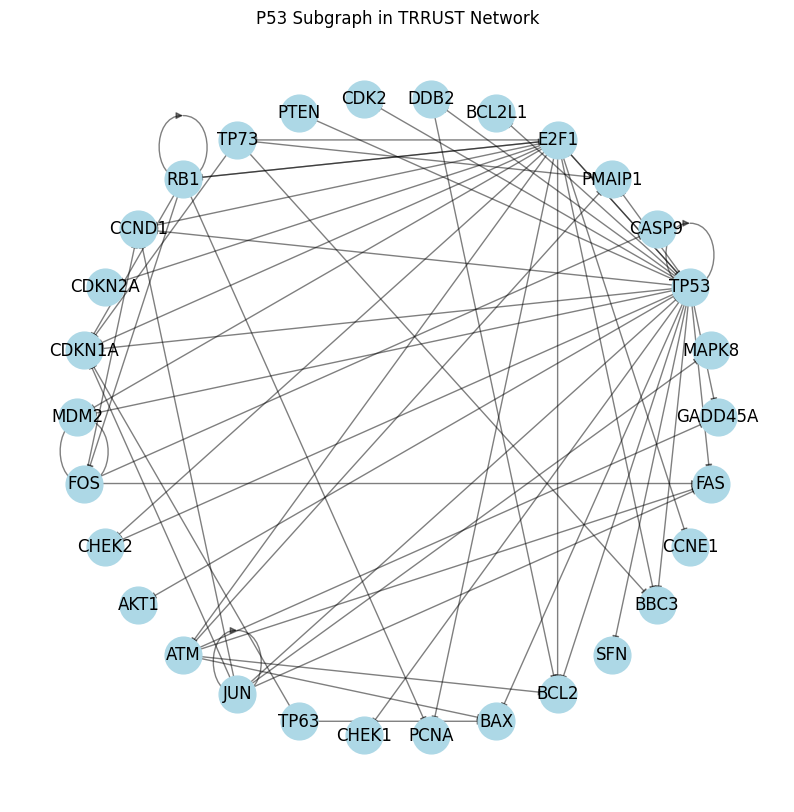

In [ ]:
# plot the p53 subgraph
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
pos = nx.circular_layout(G_p53)  # positions for all nodes
nx.draw_networkx_nodes(G_p53, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_edges(G_p53, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G_p53, pos, font_size=12, font_color='black')
plt.title("P53 Subgraph in TRRUST Network")
plt.axis('off')  # Turn off the axis
plt.show()

In [ ]:
# print number of weakly connected components in the p53 subgraph
num_components = nx.number_weakly_connected_components(G_p53)
print(f"Number of weakly connected components in p53 subgraph: {num_components}")

Number of weakly connected components in p53 subgraph: 1


In [ ]:
# print list of all nodes in the p53 subgraph
print("Nodes in the p53 subgraph:")
for node in G_p53.nodes():
    print(node)

Nodes in the p53 subgraph:
GADD45A
MAPK8
TP53
CASP9
PMAIP1
E2F1
BCL2L1
DDB2
CDK2
PTEN
TP73
RB1
CCND1
CDKN2A
CDKN1A
MDM2
FOS
CHEK2
AKT1
ATM
JUN
TP63
CHEK1
PCNA
BAX
BCL2
SFN
BBC3
CCNE1
FAS


In [22]:
# load dorothea_human_full.csv
import networkx as nx
import pandas as pd
dorothea_df = pd.read_csv('dorothea_human_full.csv')


In [23]:
from pathlib import Path
def create_topo_file_from_graph(network_name, G: nx.DiGraph, dir):
    """
    Create a 
     file as expected by racipe from a nx Graph
    and store it in the const.TOPO_PATH directory.
    :param G: nx Graph
    """
    new_file_path = Path(dir) / f"{network_name}.topo" 
    # save graph to a trrust.topo file with the header Source Target Type
    with open(new_file_path, "w") as f:
        f.write("Source Target Type\n")
        for u, v, d in G.edges(data='mor'):
            d = 1 if d > 0 else 2  # Convert to 1 for activation, 2 for inhibition
            f.write(f"{u} {v} {d}\n")

In [24]:
import matplotlib.pyplot as plt

def plot_dorothea_graph(G):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightgreen')
    # Determine edge colors based on 'mor' attribute
    edge_colors = []
    for u, v, d in G.edges(data=True):
        mor = d.get('mor', 1)
        edge_colors.append('red' if mor < 0 else 'green')
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color=edge_colors)
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')
    plt.title("Dorothea Subgraph with Key TFs")
    plt.axis('off')
    plt.show()

In [25]:

def create_dorothea_graph(dorothea_df):
    G = nx.DiGraph()
    for _, row in dorothea_df.iterrows():
        G.add_edge(row['source'], row['target'], confidence=row['confidence'], mor=row['mor'])
    return G

G = create_dorothea_graph(dorothea_df)

#group df by confidence and mor. print value counts for each group
confidence_counts = dorothea_df.groupby(['confidence', 'mor']).size().reset_index(name='count')
print("Value counts of confidence and mor in the Dorothea dataset:")
print(confidence_counts)

Value counts of confidence and mor in the Dorothea dataset:
  confidence       mor   count
0          A -1.000000     717
1          A  1.000000    5363
2          B -0.500000      22
3          B  0.500000    9011
4          C -0.333333      31
5          C  0.333333   17131
6          D -0.250000    1293
7          D  0.250000  243163


In [26]:
#filter out edges with confidence not in A, B, C
def filter_edges_by_confidence(G, valid_confidences):
    filtered_graph = G.copy()
    edges_to_remove = [(u, v) for u, v, d in filtered_graph.edges(data=True) if d['confidence'] not in valid_confidences]
    filtered_graph.remove_edges_from(edges_to_remove)
    filtered_graph.remove_nodes_from(list(nx.isolates(G)))
    return filtered_graph
# Filter the subgraph to keep only edges with confidence A, B, C
print(f"Unfiltered subgraph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
valid_confidences = ['A', 'B', 'C', 'D']
G_filtered = filter_edges_by_confidence(G, valid_confidences)
# drop isolated nodes
G_filtered = G_filtered.copy()
G_filtered.remove_nodes_from(list(nx.isolates(G_filtered)))
# Print info about the filtered graph
print(f"Filtered subgraph: {G_filtered.number_of_nodes()} nodes, {G_filtered.number_of_edges()} edges")
#print amount of weakly connected components in the filtered graph
num_components = nx.number_weakly_connected_components(G_filtered)
print(f"Number of weakly connected components in filtered subgraph: {num_components}")
print(f"size of all components in filtered subgraph: {[len(c) for c in nx.weakly_connected_components(G_filtered)]}")
# choose the largest component
largest_component = max(nx.weakly_connected_components(G_filtered), key=len)
G_filtered = G_filtered.subgraph(largest_component).copy()

Unfiltered subgraph: 18577 nodes, 276731 edges
Filtered subgraph: 18577 nodes, 276731 edges
Number of weakly connected components in filtered subgraph: 1
size of all components in filtered subgraph: [18577]


In [27]:
# interesting nodes TP53, MTOR, MAPK1, MAPK3, MAPK14, MAPK8, MAPK9, JUN, FOS
interesting_nodes = ['TP53', 'MTOR', 'MAPK1', 'MAPK3', 'MAPK14', 'MAPK8', 'MAPK9', 'JUN', 'FOS']
# check if interesting nodes are in the filtered graph
for node in interesting_nodes:
    if node in G_filtered:
        print(f"{node} is in the filtered graph")
    else:
        print(f"{node} is NOT in the filtered graph")

TP53 is in the filtered graph
MTOR is in the filtered graph
MAPK1 is in the filtered graph
MAPK3 is in the filtered graph
MAPK14 is in the filtered graph
MAPK8 is in the filtered graph
MAPK9 is in the filtered graph
JUN is in the filtered graph
FOS is in the filtered graph


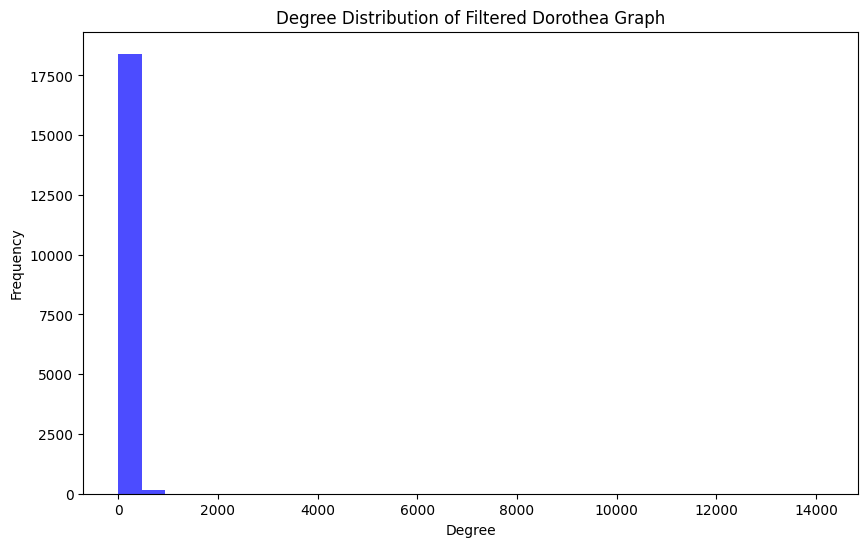

Number of nodes: 18577
Number of nodes without outgoing edges: 17934
Top 10 nodes with highest out-degree:
CTCF: 14125 out-degree
TFAP2C: 11222 out-degree
EGR1: 10673 out-degree
STAT1: 10540 out-degree
CEBPA: 9979 out-degree
FOXA1: 9964 out-degree
HNF4A: 9523 out-degree
ETS1: 9454 out-degree
FOS: 8451 out-degree
GATA3: 7216 out-degree


In [28]:
# print statistics of the graph - plot degree, print num nodes without outgoing edges
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
degree_sequence = [d for n, d in G_filtered.degree()]
plt.hist(degree_sequence, bins=30, color='blue', alpha=0.7)
plt.title("Degree Distribution of Filtered Dorothea Graph")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()
# print number of nodes without outgoing edges
num_nodes_without_outgoing_edges = sum(1 for n in G_filtered.nodes() if G_filtered.out_degree(n) == 0)
print(f"Number of nodes: {G_filtered.number_of_nodes()}")
print(f"Number of nodes without outgoing edges: {num_nodes_without_outgoing_edges}")
# print top 10 nodes with highest out-degree
top_10_out_degree_nodes = sorted(G_filtered.out_degree, key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes with highest out-degree:")
for node, degree in top_10_out_degree_nodes:
    print(f"{node}: {degree} out-degree")

In [ ]:
# i want the graph to be reduced to 150 nodes.
#  do that as follows: drop a node with a likelyhood following the out-degree. 
# a node with a high out-degree is less likely to be dropped than a node with a low out-degree
import math
import random
def reduce_graph_to_n_nodes(G, n):
    """
    Reduce the graph to n nodes by dropping nodes with a probability proportional to their out-degree.
    """

    if G.number_of_nodes() <= n:
        return G  # No need to reduce if already at or below target size
    
    while G.number_of_nodes() > n:
            # select largest weakly connected component as G
        largest_component = max(nx.weakly_connected_components(G), key=len)
        G = G.subgraph(largest_component).copy()
        # Calculate out-degree for each node
        out_degrees = dict(G.out_degree())
        total_out_degree = sum(out_degrees.values())
        
        # If total out-degree is zero, break to avoid division by zero
        if total_out_degree == 0:
            break
        
        # Calculate probabilities for each node based on out-degree (inverse relationship)
        # Nodes with lower out-degree get higher probability to be dropped
        # Add a small epsilon to avoid division by zero
        epsilon = 1e-6
        inv_out_degrees = {node: 1 / (math.sqrt(degree) + epsilon) for node, degree in out_degrees.items()}
        total_inv = sum(inv_out_degrees.values())
        probabilities = {node: inv_out_degrees[node] / total_inv for node in out_degrees}
        
        # Choose a node to drop based on the new probabilities
        node_to_drop = random.choices(list(probabilities.keys()), weights=probabilities.values(), k=1)[0]
        
        # Remove the chosen node
        G.remove_node(node_to_drop)
    
    return G

# Reduce the filtered graph to 150 nodes
target_size = 150
G_reduced = reduce_graph_to_n_nodes(G_filtered, target_size)
# print number of weakly connected components in the reduced graph
num_components = nx.number_weakly_connected_components(G_reduced)
print(f"Number of weakly connected components in reduced graph: {num_components}")
print(f"Number of nodes in reduced graph: {G_reduced.number_of_nodes()}")

Number of weakly connected components in reduced graph: 1
Number of nodes in reduced graph: 150


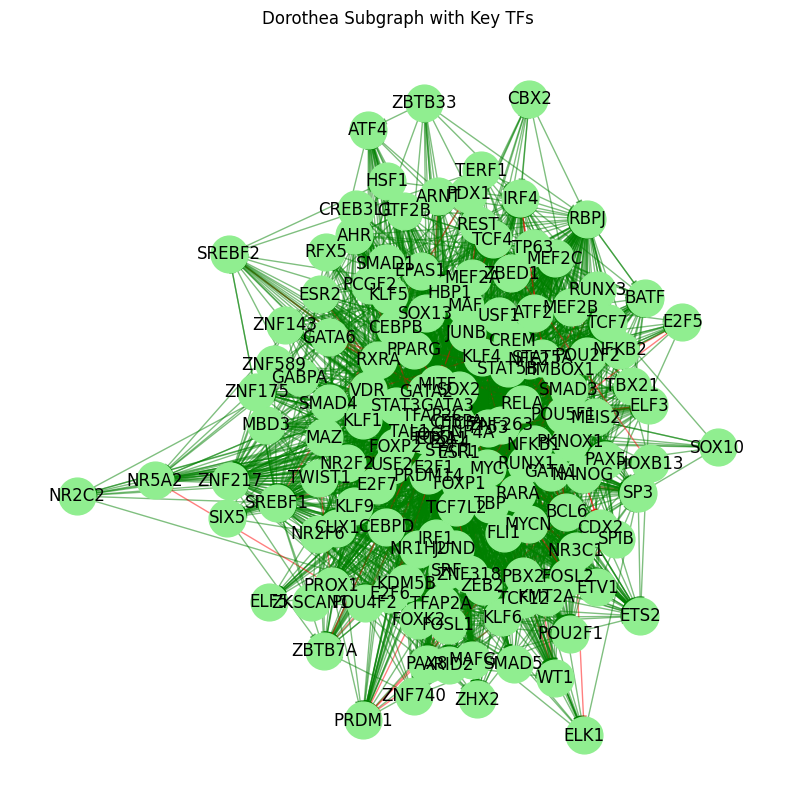

Number of nodes in reduced graph: 150
Number of edges in reduced graph: 3625


In [30]:
#visualize the reduced graph
plot_dorothea_graph(G_reduced)
# give some statistics about the reduced graph
print(f"Number of nodes in reduced graph: {G_reduced.number_of_nodes()}")
print(f"Number of edges in reduced graph: {G_reduced.number_of_edges()}")

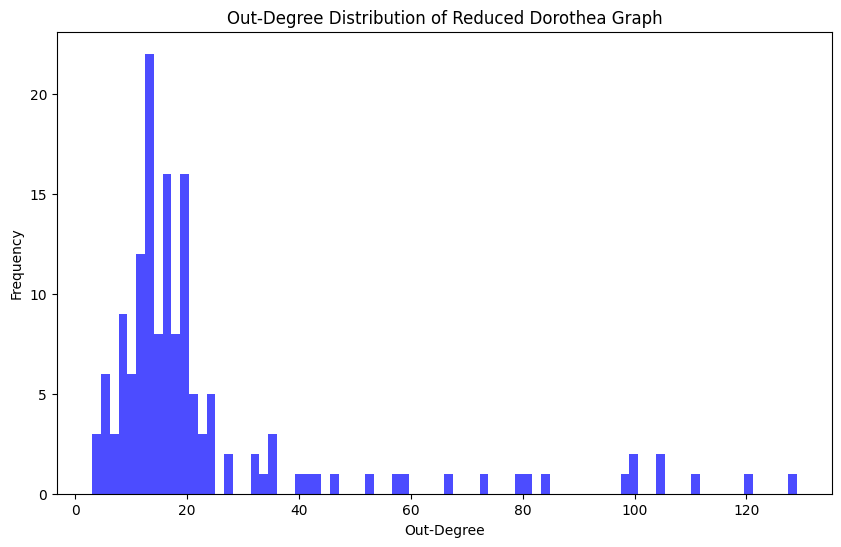

In [39]:
# create a histogram of the out-degree distribution of the reduced graph
plt.figure(figsize=(10, 6))
degree_sequence = [d for n, d in G_reduced.out_degree()]
plt.hist(degree_sequence, bins=80, color='blue', alpha=0.7)
plt.title("Out-Degree Distribution of Reduced Dorothea Graph")
plt.xlabel("Out-Degree")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# store the reduced graph as a topo file
create_topo_file_from_graph("dorothea_reduced_newest", G_reduced, Path("../topos/"))

In [33]:
# starting at node TP53, create a subgraph with 150 nodes that is biologically relevant
def create_biologically_relevant_subgraph(G, start_node, num_nodes):
    """
    Create a subgraph starting from a given node and expanding to include a specified number of nodes.
    :param G: nx Graph
    :param start_node: Node to start the subgraph from
    :param num_nodes: Number of nodes to include in the subgraph
    :return: Subgraph with the specified number of nodes
    """
    if not G.has_node(start_node):
        raise ValueError(f"Start node {start_node} is not in the graph.")
    
    # Perform a breadth-first search to find the subgraph
    sub_nodes = set()
    queue = [start_node]
    
    while queue and len(sub_nodes) < num_nodes:
        current_node = queue.pop(0)
        if current_node not in sub_nodes:
            sub_nodes.add(current_node)
            neighbors = list(G.neighbors(current_node))
            for neighbor in neighbors:
                if neighbor not in sub_nodes:
                    queue.append(neighbor)
    
    return G.subgraph(sub_nodes).copy()

In [34]:
MTOR_nodes = ["IGF1R","INSR","IRS1","PIK3CA","PIK3CB","PIK3CD","PIK3R1","PIK3R2","PIK3R3","RAF1","BRAF","MAPK1","MAPK3","HRAS","KRAS","NRAS","MAP2K1",
              "MAP2K2","PTEN","PDPK1","AKT3","AKT1","AKT2","TSC1","TSC2","RHEB","EIF4EBP1","LPIN1","LPIN2","RPS6KB1","RPS6KB2","RHOA","PRKCA","PRKCB",
              "PRKCG","SGK1","RRAGB","RRAGA","RRAGD","RRAGC","RPS6KA6","RPS6KA1","RPS6KA2","RPS6KA3","PRKAA1","PRKAA2","GRB2","DDIT4","EIF4E","EIF4E2",
              "ULK1","ULK2","RPS6","TNF","IKBKB","TNFRSF1A","SLC7A5","SLC3A2","SOS1","SOS2","NPRL2","NPRL3","DEPDC5","SKP2","MIOS","SEC13","WDR59",
              "SEH1L","ATP6V1D","ATP6V1H","ATP6V1A","ATP6V1B1","ATP6V1B2","ATP6V1C1","ATP6V1E1","ATP6V1F","ATP6V1G1","LAMTOR5","LAMTOR2","LAMTOR3",
              "CHUK","IGF1","INS","GRB10","FLCN","EIF4B","MTOR","DEPTOR","MLST8","TTI1","TELO2","PRR5","PRR5L","MAPKAP1","GSK3B","WNT16","WNT4","WNT1",
              "WNT2","WNT3","WNT5A","WNT6","WNT7A","WNT8B","WNT10B","WNT11","WNT2B","WNT5B","FZD10",
              "FZD2","FZD5","FZD3","FZD1","FZD4","FZD6","FZD7","FZD8","FZD9","LRP6","LRP5","DVL1","DVL2","DVL3","CLIP1","STK11","STRADA","CAB39","CAB39L"]
MAPK_nodes = ["RASGRF1","DUSP10","DUSP1","DUSP2","DUSP4","DUSP5","DUSP6","DUSP7","DUSP8","DUSP9","DUSP3","PTPN7","PTPRR","PPM1B","FASLG","MAP4K4",
              "PLA2G4A","PLA2G4C","STMN1","MAPT","NFKB1","NFKB2","RELA","RELB","CHUK","IKBKB","IKBKG","MAPK1","MAPK3","LAMTOR3","MAP2K2","MAP2K1",
              "RAF1","BRAF","RASA1","NF1","PRKCA","PRKCB","PRKCG","RAP1A","RAP1B","PRKACA","PRKACB","PRKACG","RAPGEF2","RASA2","RRAS2","MRAS","HRAS",
              "KRAS","NRAS","RRAS","RASGRP1","RASGRP2","RASGRP3","SOS1","SOS2","GNA12","GNG12","GRB2","CSF1R","EGFR","EPHA2","ERBB2","ERBB3","ERBB4",
              "FGFR1","FGFR3","FGFR2","FGFR4","FLT1","FLT3","FLT4","IGF1R","INSR","KDR","KIT","MET","NGFR","NTRK1","NTRK2","PDGFRA","PDGFRB","RET",
              "TEK","CACNG3","CACNG2","CACNG5","CACNG4","CACNA2D3","CACNA1A","CACNA1B","CACNA1C","CACNA1D","CACNA1E","CACNA1F","CACNA1S","CACNA2D1",
              "CACNB1","CACNB2","CACNB3","CACNB4","CACNG1","CACNA1I","CACNA1H","CACNA1G","CACNA2D2","NR4A1","MAPK7","MAP2K5","NLK","CDC25B","RPS6KA4",
              "RPS6KA5","MAPKAPK3","MAPKAPK2","ATF4","MEF2C","MAX","DDIT3","ELK4","TP53","ELK1","ATF2","MAPK14","MAPK11","MAPK13","PPP5C","MAP2K6",
              "MAP2K3","PPM1A","AKT3","AKT1","AKT2","TAOK3","TAOK1","TAOK2","MAP3K4","HSPB1","MAP3K7","MAP3K5","MAP3K6","MAP3K20","MAP3K12","MAP3K13",
              "MAP3K9","MAP3K10","MAP4K2","STK3","STK4","ECSIT","TAB2","TAB1","GADD45G","GADD45A","GADD45B","TRAF6","DAXX","TRAF2","CASP3","CD14",
              "TGFBR1","TGFBR2","FAS","IL1R1","IL1RAP","TNFRSF1A","TGFB1","TGFB2","TGFB3","IL1A","IL1B","TNF","MAPKAPK5","RAC1","RAC2","RAC3","CDC42",
              "PAK1","PAK2","MAP3K2","MAP3K3","MAPK8IP2","MAPK8IP1","MAP3K11","MAP2K7","MAPK8","MAPK9","MAPK10","MAP2K4","CRK","CRKL","ARRB1","ARRB2",
              "MECOM","HSPA1A","HSPA1L","HSPA6","HSPA8","JUND","FOS","JUN","NFATC3","NFATC1","PPP3CA","PPP3CB","PPP3CC","PPP3R1","MAPK8IP3","FLNA",
              "MAP3K1","MAP3K8","MAP4K1","MAP4K3","SRF","MYC","RPS6KA6","RPS6KA1","RPS6KA2","RPS6KA3","MKNK2","MKNK1","CSF1","EFNA1","EFNA2","EFNA3",
              "EFNA4","EFNA5","EGF","EREG","FGF1","FGF2","FGF3","FGF4","FGF5","FGF6","FGF7","FGF8","FGF9","VEGFD","FLT3LG","FGF20","FGF21","GDNF",
              "FGF22","ANGPT1","ANGPT2","HGF","IGF1","INS","AREG","KITLG","NGF","NRTN","NTF3","ANGPT4","PDGFA","PDGFB","PGF","PDGFC","PSPN","BDNF",
              "TGFA","VEGFA","VEGFB","VEGFC","PDGFD","FGF23","FGF18","FGF17","ARTN","TRADD","MYD88","IRAK1","IRAK4","ARAF",]
TP53_nodes = ["SIAH1","IGFBP3","GADD45G","GADD45A","GADD45B","MDM4","CHEK1","ATR","CHEK2","ATM","RPRM","SFN","CDK2","CCNE1","CCNE2","TSC2","PPM1D",
              "TP73","CCNG1","CCNG2","RRM2","DDB2","STEAP3","PTEN","SERPINB5","CD82","THBS1","IGF1","SERPINE1","ADGRB1","CDKN2A","CDKN1A","ZMAT3",
              "BID","EI24","TP53I3","FAS","GTSE1","BAX","PIDD1","TNFRSF10B","CASP8","CDK1","APAF1","CYCS","CASP9","MDM2","TP53","RCHY1","CDK4","CDK6",
              "CCND1","CCND2","CCND3","PERP","SESN1","CCNB1","CCNB2","CASP3","TP53AIP1","BBC3","PMAIP1","SIVA1","BCL2L1","BCL2","PPP1R13L",]

Subgraph with MAPK nodes: 224 nodes, 632 edges
Number of weakly connected components in MAPK subgraph: 1


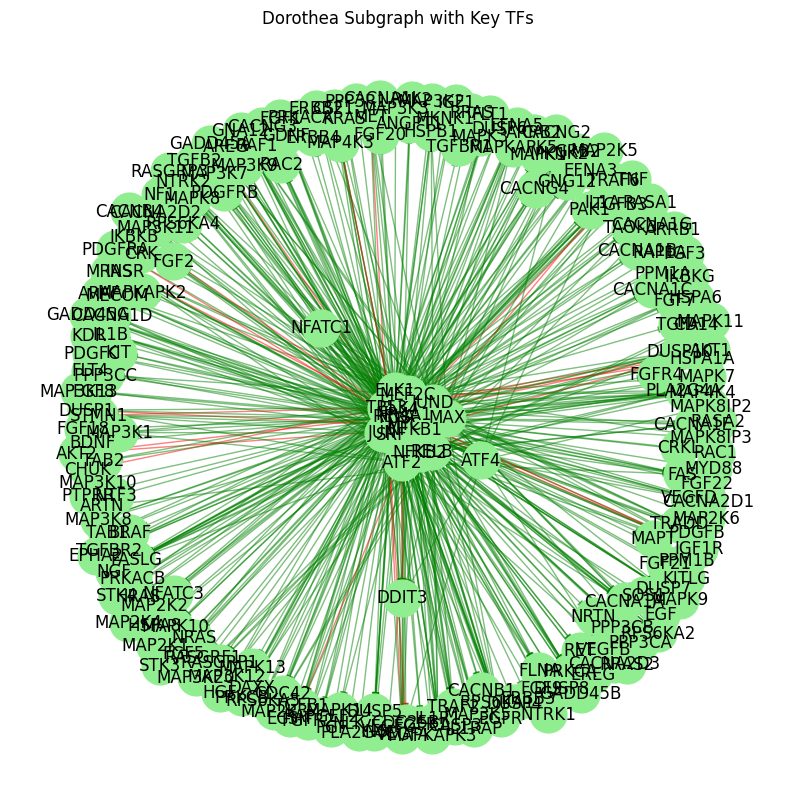

In [35]:
# Create a subgraph with the MTOR nodes
G_sub = G_filtered.subgraph(MAPK_nodes).copy()  
# drop isolated nodes
G_sub.remove_nodes_from(list(nx.isolates(G_sub)))
print(f"Subgraph with MAPK nodes: {G_sub.number_of_nodes()} nodes, {G_sub.number_of_edges()} edges")
# print number and size of weakly connected components
num_components = nx.number_weakly_connected_components(G_sub)
print(f"Number of weakly connected components in MAPK subgraph: {num_components}")  

# plot the subgraph
plot_dorothea_graph(G_sub)

In [36]:


# Step 1: pick key TFs
seed_tfs = ['MTOR']  # good hubs
# seed_tfs = ['TP53']  # good hubs
N_NODES = 150  # maximum number of nodes in the subgraph

# Step 2: find their targets
nodes = set(seed_tfs)
for tf in seed_tfs:
    nodes.update(G.successors(tf))  # first-degree targets

# Optional: add second layer to enrich cycles
for node in list(nodes):
    nodes.update(G.successors(node))

# Step 3: Create the subgraph
G_sub = G.subgraph(nodes).copy()

# Optionally reduce to top 50 nodes by degree
if len(G_sub) > N_NODES:
    top_nodes = sorted(G_sub.degree, key=lambda x: -x[1])[:N_NODES]
    G_sub = G_sub.subgraph([n for n, _ in top_nodes]).copy()

# Print info
print(f"Subgraph: {G_sub.number_of_nodes()} nodes, {G_sub.number_of_edges()} edges")



Subgraph: 1 nodes, 0 edges


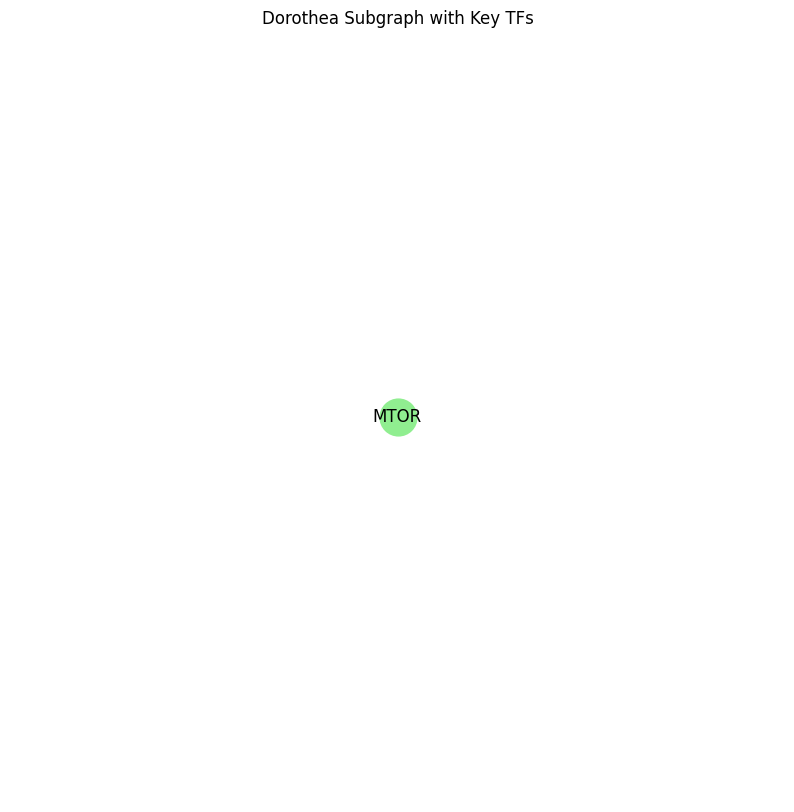

In [37]:
plot_dorothea_graph(G_sub)

In [38]:
# Create topo file
create_topo_file_from_graph("dorothea_tp53_myc", G_filtered, "../../data/topos")

FileNotFoundError: [Errno 2] No such file or directory: '../../data/topos/dorothea_tp53_myc.topo'